In [2]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3 
!pip install torch

!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 991 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 32.0 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=619636 sha256=44d5918af23cf79e329b5bcbf7bcf65cc675d2c77ae2b6add6ca779e6e6e45ca
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 30.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [5]:
##GPU 사용 시
device = torch.device("cuda:0")

bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/My Drive/nlp_liflow/

/content/drive/My Drive/nlp_liflow


In [8]:
!ls

자연어처리_1.ipynb		  item_all_방송_연예.csv
자연어처리_2.ipynb		  item_all_재테크.csv
all_df_with_tokens.csv		  item_all_직장.csv
all_sen.csv			  item_all_음식.csv
cc.ko.300.bin.gz		  item_all_건강.csv
data.csv			  item_all_스포프.csv
df_all				  item_all_스포츠.csv
df_all.csv			  item_all_자동차.csv
df_all_GloVe.csv		  item_all_다이어트.csv
df_all_tfidf.csv		  item_all_취미생활.csv
doc2vec_100.model		  item_all.csv
feature.pkl			  item_all_doc2vec_k-means.csv
feature.pkl.mtx			  item_all_GloVe_DBSCAN.csv
final_trainingset_자녀.csv	  item_all_glove_k-means.csv
final_trainingset_자동차.csv	  ko.bin
final_trainingset_sports.csv	  list_to_csv.csv
first_embedding_clustering.model  nlp_tokenizer.ipynb
glove_model_100.model		  스포츠_sen.csv
glove_model.model		  sen.csv
glove_word_dict_128.pickle	  sen_preprocessig.csv
item_1.csv			  스포츠_sen_prerprocessing.csv
item_all_자녀.csv		  sentence_Summarizer.ipynb
item_all_노후.csv		  textrank
item_all_국가_지역.csv		  textrank_

In [9]:
import pandas as pd
df = pd.read_csv('item_all_스포츠.csv')
df = df.iloc[:,[2, 1]]
df

,convrs,cluster
0,볼링은 그다지 돈이 많이 들어가는 운동도 아니고 둘이 가서 쳐도 되잖아,0
1,특히 남들이 자주 하는 당구 같이 공 가지고 노는 건 잘 못 하는 것 같아요,0
2,우리는 그나마 서울 가서 접하다 보니까 실내 운동을 자주 하게 되었지,0
3,아니 나도 마찬가지야 나도 똑같애,0
4,그냥 골프를 더 하고 싶은데 돈 생각했을 때 볼링을 하자고 하는 거야,0
...,...,...
3514,그렇게 사회 생활 하면서 다른 거에 돈 허투루 쓰지 않으면 충분히 괜찮을 것 같아,9
3515,보통 이제 잘 하는 사람만 키우고 못하는 사람은 신경 안 쓰는 약간 그런 부분이 있잖아,9
3516,예전에는 그걸 보더라도 그런 자세한 부분이 보이지 않았었거든요,9
3517,홀이라고 하던데 홀에 나가서 골프를 치면 참 멋있어 보이고 운동도 된다든데,9


In [1]:
inw =df.loc[df['cluster']==1]
inw

NameError: ignored

In [10]:
df.isnull().sum()

convrs     0
cluster    0
dtype: int64

In [11]:
np.unique(df.cluster)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
df.loc[(df['cluster']== 9), 'cluster'] = 1
df.loc[(df['cluster']== 7), 'cluster'] = 3
np.unique(df.cluster)

array([0, 1, 2, 3, 4, 5, 6, 8])

In [13]:
df.loc[(df['cluster']== 8), 'cluster'] = 7
np.unique(df.cluster)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
inw = df.loc[df['cluster']==0]
inw[:10:2]

,convrs,cluster
0,오토바이 정말 좋은 취미이긴 한데 이게 절대 주가 될 수는 없고 써브가 돼야 돼,0
2,나는 또 좋아하는 게 오토바이 이런 걸 좋아하는데 너 덕분에 자전거도 입문했어,0
4,아무튼 너도 기회가 되면 나랑 같이 한번 오도바이를 타보는 것도 좋을 것 같아,0
6,나는 대한 관심이 별로 없어서 그냥 고급 취미로 느껴져,0
8,나는 오도바이에 대한 관심이 별로 없어서 그냥 고급 취미로 느껴져,0


In [65]:
df.to_csv('item_all_스포츠.csv')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['convrs'], df['cluster'], stratify=df['cluster'], test_size=0.2, shuffle=True, random_state=34)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, stratify=y_test, test_size=0.5, shuffle=True, random_state=34)

In [15]:
train = []
for q, label in zip(x_train, y_train)  :
    data = []
    data.append(q)
    data.append(str(label))

    train.append(data)

In [16]:
test = []
for q, label in zip(x_test, y_test)  :
    data = []
    data.append(q)
    data.append(str(label))

    test.append(data)

In [17]:
val = []
for q, label in zip(x_val, y_val)  :
    data = []
    data.append(q)
    data.append(str(label))

    val.append(data)

In [18]:
len(train)

2815

In [19]:
train

[['쳤는데 그때 잠깐 밖에 나와 있을 때 그게 장외로 넘어와서 내 앞에 딱 떨어졌어', '1'],
 ['병원에서 무슨 운동을 하라고 이야기를 할 테니까 하긴 해야겠지  ', '4'],
 ['핸드폰이 나오고 아이티 시대가 되니까 그런 문화가 점점 사라져 가지', '1'],
 ['내가 수영장을 왜 못 가냐면 수영을 이상하게 개헤엄으로 배웠으니까', '1'],
 ['그래서 올라가서 선생님 따라 운동을 따라하니까  그 운동은 잘 맞았어', '4'],
 ['운동하도록 헬스비나 열심히 끊어달라고 말하거든 그 말이 맞잖아', '6'],
 ['그 친구가 자전거 타잖아 자전거 복장을 다 준비하고 타는데', '6'],
 ['바닷속에 들어가서 우리가 접하지 않았던 생물체를 직접 눈으로 보는 거야', '1'],
 ['그러니까 제일 만만한 것이 운동장을 도는 건데 그것도 다리가 아프니까', '4'],
 ['사실 지금 류현진이 한화 있을 때보다 미국에서 더 잘 하고 있다고 생각해', '3'],
 ['걔가 십 오분만 뛰어 준다고 얘기를 하나 봐 이것도 한번 자세히 봐야 될 것 같아', '1'],
 ['팔 돌리는 기구가 아주 안 좋은 운동 기구래 그런데 어디서나 있더라고', '1'],
 ['이게 하나의 작은 스포츠가 아니라 정말 어마어마한 의미를 가지고 있다고 생각하거든', '0'],
 ['월평동 거기 백합 아파트 앞에 인가 샛별인가 백합인가 모르겠어', '1'],
 ['방송으로 그런 걸 보면 나는 류현진이 정말 대단하다고 생각하게 돼요', '3'],
 ['이백 삼백 사백 정도 되는 그런 거는 무게가 좀 무거울 거 같더라고', '1'],
 ['진짜 운동이라고 생각하고 다녀야 한대 수영을 다 배울 수 있는 기간인가 봐', '6'],
 ['집이를 보면 너무 부럽더라', '1'],
 ['나도 그동안에는 피곤하니까 항상 힘들다는 생각이 먼저 들었던 것 같아', '6'],
 ['그리고 당신이 골프 배우고 싶다는 거 못하게 태클 걸어서 미안하기도 해', '1'],
 ['우리 아빠가 테니스를 시작한

In [20]:
len(test)

352

In [21]:
test

[['꼭 해야된다고 하는 그 생각밖에 없어 그러니까 중독이라고 하지', '1'],
 ['그러니까 취미생활도 이거랑 똑같다고 봐 전혀 돈을 무시하고 어떻게 해', '3'],
 ['내려올 때는 다리가 떨렸는데  정말 생명의 위협을 느낄 정도로 힘들었어', '4'],
 ['처음부터 자세 바르게 잡고 힘 빼고 하면 뭐든지 잘 된다고 했어', '1'],
 ['더 분발해야 되겠지만 아직은 우드라든가 세계적인 선수들이 워낙 많잖아', '2'],
 ['내가 요번에 레슨 선생님을 소개시켜줬는데 진짜 좋은 선생님을 만났다고', '4'],
 ['그러니까 멀리 보낸다는 생각이 있어서  이게 몸이 쉽게 긴장되는 것 같아', '1'],
 ['그래서 그걸 준비를 해야 되니까 나도 겸사겸사 같이 해보게 된 거지', '1'],
 ['그다음에 여러 후배 선수들이 차범근 씨로 인해서 많이 나왔잖아', '2'],
 ['이제 그런 모범적이고 입지적인 그런 부분에서 참 이범호 선수는 훌륭하다고 생각해요', '3'],
 ['친구 조언대로 다시 생각해 보니까  제가 자기화를 못 시켰던 것 같아요', '1'],
 ['의사 선생님이 다리 때문에 그 운동 하지 말라고 하면 못할 것 아니야', '4'],
 ['그게 왜 그러냐면  참 어려운 운동을 하면서도 항상 밝고 이렇게 웃는 얼굴로 임하더라고', '1'],
 ['자꾸 운동을 해야 돼 혈압이 있어서 운동 안 하면 우리 건강이 안 좋아질 거야', '6'],
 ['그래도 우리나라는 아직도 축구하면 차범근이랑 박지성  그리고 손흥민이지', '2'],
 ['걷는 것도 호흡이 맞아야 산에 둘이 가는 것도 발이 맞아야 재미있지', '0'],
 ['또 일하는 데 힘들지도 않고 그래서 더 좋아진 것 같아 나는 안전 만족해', '1'],
 ['예전에는 댄스 스포츠라고 삼년을 하면서 회장도 하고 그랬는데', '0'],
 ['아무래도 순발력은 떨어지겠지 젊었을 때 보다', '1'],
 ['사실은 내가 탁구 레슨을 받다가 또 요새 바빠져서 레슨을 안 받고 있거든', '6'],
 

In [22]:
len(val)

352

In [23]:
val

[['첫 번째로는  선천적으로 운동신경이 없는 편이면 골프를 못하는 건 사실이야', '1'],
 ['자전거 타는 사람들이 종일 자전거 타고 어디를 갔다 오나 봐 단체로', '7'],
 ['그리고 수영복뿐만 아니라 수영모랑 세안 도구 같은 것들도 같이 준비해야 돼', '1'],
 ['어떤 병원에 가니까 몸이 많이 차다고 해서 수영도 생각해봐야 될 것 같고', '4'],
 ['십 이억이 넘어 그런데 상금을 부모님께 드리고 난 얼마든지 벌 수 있다고', '2'],
 ['허구연은 대전에서 돔구장 짓자고 말하던데  우리 대전에 그렇게 돈이 많아', '3'],
 ['원 아웃이 되고  박찬호가 수비를 엄청 잘해줘서 자기 꿈을 이뤄낸 거야', '3'],
 ['그런데 수업하는 한 오십분 동안 머리가 다 젖도록 땀이 나더라고', '6'],
 ['열심히 걷고 운동 기구하고 이런 거 보면 정말 건강을 잃으면 다 잃는다잖아요', '4'],
 ['어떤 쪽이 좋은지는 모르겠어 요즘 특별히 관심 가지고 있는 종목 있어', '3'],
 ['치다가 결국에는 진짜 무게에 못 이겨서 같이 빨려 들어간 적도 있어', '3'],
 ['너 약속 많다며  근데 갈 수 있는 거야 나도 요즘 약속도 있고 그렇거든', '1'],
 ['그러니까 지금 남녀노소 등산  배드민턴 등 안하는 운동이 없는 것 같더라고', '6'],
 ['탁구는 아파트 단지에 거의 탁구장이 다 있다니까 거기 가서 같이 치면 돼', '6'],
 ['그래서 대단하다  저런 끈기면 무엇이든지 못 할 것이 없겠구나', '1'],
 ['스포즈를 찾아서  골프나 그런 것은 조금  늦었다는 생각이 들지만', '1'],
 ['등산 가자고 하면 산 앞에 내려 주면 앉아서 놀다가 혼자 산책하잖아', '6'],
 [' 몇 번 푸시업도  그러고 쇼파에 앉아서 티브이 보고', '1'],
 ['바로 잡지도 않고 공간으로 패스해 줘 버리니까  보면 진짜 잘 하더라고', '1'],
 ['그래 가지고 그때 이제 백억 시대를 열었잖아요 사실 우리 일반인한테는 엄청 큰

In [24]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len, pad, pair):
        transform = nlp.data.BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [26]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 20
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [27]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(train, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(val, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/nlp_liflow/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [28]:
# pytorch용 DataLoader 사용
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [29]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 8, 
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)
      

In [30]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [31]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [32]:
# 옵티마이저 선언
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # softmax용 Loss Function 정하기 <- binary classification도 해당 loss function 사용 가능

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


In [33]:
# 학습 평가 지표인 accuracy 계산 
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [34]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [35]:
# 모델 학습 시작
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) # gradient clipping
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
  
    model.eval() # 평가 모드로 변경
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
  

<ipython-input-35-f43f33b084e3>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 2.1363658905029297 train acc 0.15625
epoch 1 train acc 0.33075171356421357


<ipython-input-35-f43f33b084e3>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 1 val acc 0.4270833333333333


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.6955201625823975 train acc 0.453125
epoch 2 train acc 0.47993326118326113


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 2 val acc 0.5677083333333334


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.4059292078018188 train acc 0.609375
epoch 3 train acc 0.6256087662337663


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 3 val acc 0.6666666666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 1.2377431392669678 train acc 0.515625
epoch 4 train acc 0.728975018037518


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 4 val acc 0.7005208333333334


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.9046115279197693 train acc 0.734375
epoch 5 train acc 0.8096139971139972


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 5 val acc 0.7135416666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.8680307269096375 train acc 0.75
epoch 6 train acc 0.8508128156565656


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 6 val acc 0.7265625


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.6853622794151306 train acc 0.8125
epoch 7 train acc 0.9179631132756132


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 7 val acc 0.7057291666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.47630125284194946 train acc 0.90625
epoch 8 train acc 0.9264689303751804


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 8 val acc 0.75


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.35285815596580505 train acc 0.890625
epoch 9 train acc 0.9495625901875901


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 9 val acc 0.734375


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.1305338442325592 train acc 0.953125
epoch 10 train acc 0.9584347943722943


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 10 val acc 0.7447916666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.1133289486169815 train acc 0.96875
epoch 11 train acc 0.9708694083694084


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 11 val acc 0.7265625


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.08358324319124222 train acc 0.984375
epoch 12 train acc 0.9811733405483405


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 12 val acc 0.7317708333333334


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.09249742329120636 train acc 0.984375
epoch 13 train acc 0.982593795093795


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 13 val acc 0.7447916666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.1275051385164261 train acc 0.96875
epoch 14 train acc 0.9847244769119768


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 14 val acc 0.75


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.019665950909256935 train acc 1.0
epoch 15 train acc 0.9900511814574314


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 15 val acc 0.734375


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.05617111548781395 train acc 0.984375
epoch 16 train acc 0.9921762265512265


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 16 val acc 0.7369791666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.020223740488290787 train acc 1.0
epoch 17 train acc 0.9939630681818182


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 17 val acc 0.7630208333333334


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.017081959173083305 train acc 1.0
epoch 18 train acc 0.9953835227272727


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 18 val acc 0.7630208333333334


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.015259789302945137 train acc 1.0
epoch 19 train acc 0.9968039772727273


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 19 val acc 0.7526041666666666


  0%|          | 0/44 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.01374607440084219 train acc 1.0
epoch 20 train acc 0.9964488636363636


  0%|          | 0/6 [00:00<?, ?it/s]

epoch 20 val acc 0.7526041666666666


In [40]:
def calc_max(X):
  max_vals, max_indices = torch.max(X, 1)
  return max_indices

def softmax(vals, idx):
    valscpu = vals.cpu().detach().squeeze(0)
    a = 0
    for i in valscpu:
        a += np.exp(i)
    return ((np.exp(valscpu[idx]))/a).item() * 100

def testModel(model, seq):
    cate = ['0','1','2','3','4','5','6','7']
    tmp = [seq]
    transform = nlp.data.BERTSentenceTransform(tok, max_len, pad=True, pair=False)
    tokenized = transform(tmp)

    model.eval()
    result = model(torch.tensor([tokenized[0]]).to(device), [tokenized[1]], torch.tensor(tokenized[2]).to(device))
    idx = result.argmax().cpu().item()
    idx_all = [0, 1, 2, 3, 4, 5, 6, 7]
    print(seq)
    print("문장의 요약문은:", cate[idx])
    for i in idx_all:
      print("{:.2f}%".format(softmax(result,i)))
    print("신뢰도는:", "{:.2f}%".format(softmax(result,idx)))

In [41]:
test_df = pd.DataFrame(test, columns = ['convra', 'cluster'])

In [42]:
test_df

,convra,cluster
0,꼭 해야된다고 하는 그 생각밖에 없어 그러니까 중독이라고 하지,1
1,그러니까 취미생활도 이거랑 똑같다고 봐 전혀 돈을 무시하고 어떻게 해,3
2,내려올 때는 다리가 떨렸는데 정말 생명의 위협을 느낄 정도로 힘들었어,4
3,처음부터 자세 바르게 잡고 힘 빼고 하면 뭐든지 잘 된다고 했어,1
4,더 분발해야 되겠지만 아직은 우드라든가 세계적인 선수들이 워낙 많잖아,2
...,...,...
347,그러면서 그 사람들한테 배우고 또 도구 구입하는 요령도 물어보고 하는 거지,1
348,근데 육개월 이후에는 조금 주춤한다고 그러드라 그땐 더 힘든가봐,1
349,꽤 다양하게 나눠져 있어 나도 출근 전에 가거든 아마 가능할거야,6
350,동솅은 다른 것도 배워본다꼬 하는데 저는 몸치라서 엄두도 못 내요,1


In [43]:
test_df['convra'].apply(lambda x: testModel(model, x))

꼭 해야된다고 하는 그 생각밖에 없어 그러니까 중독이라고 하지
문장의 요약문은: 1
0.12%
99.65%
0.04%
0.03%
0.05%
0.01%
0.06%
0.03%
신뢰도는: 99.65%
그러니까 취미생활도 이거랑 똑같다고 봐 전혀 돈을 무시하고 어떻게 해
문장의 요약문은: 1
0.95%
98.68%
0.07%
0.14%
0.04%
0.02%
0.04%
0.07%
신뢰도는: 98.68%
내려올 때는 다리가 떨렸는데  정말 생명의 위협을 느낄 정도로 힘들었어
문장의 요약문은: 4
0.18%
0.20%
0.13%
0.05%
98.80%
0.22%
0.26%
0.15%
신뢰도는: 98.80%
처음부터 자세 바르게 잡고 힘 빼고 하면 뭐든지 잘 된다고 했어
문장의 요약문은: 4
0.14%
0.14%
0.13%
0.06%
98.88%
0.21%
0.30%
0.14%
신뢰도는: 98.88%
더 분발해야 되겠지만 아직은 우드라든가 세계적인 선수들이 워낙 많잖아
문장의 요약문은: 2
0.14%
0.25%
98.87%
0.16%
0.11%
0.36%
0.07%
0.05%
신뢰도는: 98.87%
내가 요번에 레슨 선생님을 소개시켜줬는데 진짜 좋은 선생님을 만났다고
문장의 요약문은: 4
0.19%
0.17%
0.17%
0.08%
98.80%
0.26%
0.19%
0.15%
신뢰도는: 98.80%
그러니까 멀리 보낸다는 생각이 있어서  이게 몸이 쉽게 긴장되는 것 같아
문장의 요약문은: 1
0.13%
99.64%
0.03%
0.05%
0.03%
0.01%
0.05%
0.05%
신뢰도는: 99.64%
그래서 그걸 준비를 해야 되니까 나도 겸사겸사 같이 해보게 된 거지
문장의 요약문은: 1
0.10%
99.52%
0.03%
0.03%
0.07%
0.01%
0.20%
0.05%
신뢰도는: 99.52%
그다음에 여러 후배 선수들이 차범근 씨로 인해서 많이 나왔잖아
문장의 요약문은: 3
0.06%
0.14%
0.11%
99.34%
0.05%
0.17%
0.04%
0.09%
신뢰도는:

0      None
1      None
2      None
3      None
4      None
       ... 
347    None
348    None
349    None
350    None
351    None
Name: convra, Length: 352, dtype: object

In [44]:
testModel(model, "초코파이가 맛있어")

초코파이가 맛있어
문장의 요약문은: 1
0.51%
94.83%
0.12%
0.04%
0.40%
0.03%
3.97%
0.09%
신뢰도는: 94.83%


In [45]:
# 테스트 문장 예측

y_pred = []
y_true = []

unseen_test = test_df
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  label = label.long().to(device)
  out = model(token_ids, valid_length, segment_ids)
  #test_acc += calc_accuracy(out, label)
  #print(out)
  prediction = calc_max(out)
  y_pred.append(prediction)
  y_true.append(label)

#print(y_pred)
#print(y_true)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-45-91a39338bd2c>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):


  0%|          | 0/352 [00:00<?, ?it/s]

In [46]:
y_trues = []
for i in range(len(y_true)):
  true = y_true[i].data.cpu().numpy()
  y_trues.append(true)

In [47]:
y_predictions = []
for i in range(len(y_pred)):
  pred = y_pred[i].data.cpu().numpy()
  y_predictions.append(pred)

In [48]:
test_df['y_true'] = y_trues
test_df['y_prediction'] = y_predictions
test_df

,convra,cluster,y_true,y_prediction
0,꼭 해야된다고 하는 그 생각밖에 없어 그러니까 중독이라고 하지,1,[1],[1]
1,그러니까 취미생활도 이거랑 똑같다고 봐 전혀 돈을 무시하고 어떻게 해,3,[3],[1]
2,내려올 때는 다리가 떨렸는데 정말 생명의 위협을 느낄 정도로 힘들었어,4,[4],[4]
3,처음부터 자세 바르게 잡고 힘 빼고 하면 뭐든지 잘 된다고 했어,1,[1],[4]
4,더 분발해야 되겠지만 아직은 우드라든가 세계적인 선수들이 워낙 많잖아,2,[2],[2]
...,...,...,...,...
347,그러면서 그 사람들한테 배우고 또 도구 구입하는 요령도 물어보고 하는 거지,1,[1],[1]
348,근데 육개월 이후에는 조금 주춤한다고 그러드라 그땐 더 힘든가봐,1,[1],[1]
349,꽤 다양하게 나눠져 있어 나도 출근 전에 가거든 아마 가능할거야,6,[6],[6]
350,동솅은 다른 것도 배워본다꼬 하는데 저는 몸치라서 엄두도 못 내요,1,[1],[1]


In [49]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
confusion_matrix(y_trues, y_predictions)

array([[ 12,   5,   0,   0,   1,   0,   2,   2],
       [  3, 122,   2,   5,   2,   0,  18,   2],
       [  0,   5,  18,   5,   0,   0,   0,   0],
       [  3,   5,   3,  34,   0,   1,   0,   1],
       [  0,   4,   0,   0,  22,   0,   4,   0],
       [  0,   1,   3,   1,   0,   2,   0,   0],
       [  0,   9,   0,   0,   0,   0,  38,   2],
       [  1,   3,   0,   0,   0,   0,   1,  10]])

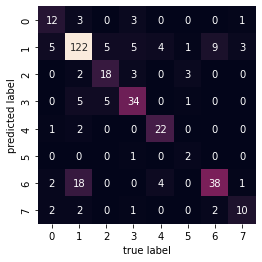

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_trues, y_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [51]:
precision = precision_score(y_trues, y_predictions, average = 'weighted')
precision

0.739307428897212

In [52]:
recall = recall_score(y_trues, y_predictions, average = 'weighted')
recall

0.7329545454545454

In [53]:
f1score = f1_score(y_trues, y_predictions, average= 'weighted')
f1score

0.7321274030736848

In [54]:
# 테스트 문장 예측
test_sentence = '요즘 야구가 재미있어'
test_label = 3

unseen_test = pd.DataFrame([[test_sentence, test_label]], columns = [['convrs', 'cluster']])
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  print(out)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-54-0849d1e84b35>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 1.1434, -1.1995, -0.5244,  5.4255, -1.4922,  0.1793, -2.2152, -0.4636]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [63]:
class summarization():
  def __init__(self,convrs,model):
        self.model = model
        self.convrs = convrs

  def summarize(self):
    self.summ = ["구기종복에 대한 내용",
                 '일관성 없음',
                 '운동선수',
                 '야구',
                 '건강을 위한 운동',
                 '감독',
                 '헬스, 운동',
                 '연습, 자전거']
    self.summ_result = [0 for i in range(8)]
    self.len = len(self.convrs)
    for i in self.convrs:
      print(i)
      data = [i, '0']
      dataset_another = [data]
      another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
      test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
     
      model.eval()

      for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        print(out)

        for i in out:
          logits=i
          logits = logits.detach().cpu().numpy()
          print("주제 : " , np.argmax(logits))
          self.summ_result[np.argmax(logits)]+=1
          print()
    for i in range(len(self.summ)):
      if i == 1:
        pass
      else:
        print(self.summ[i], self.summ_result[i]/self.len*100, "% 차지합니다." )

## 새로운 문장으로 분류

In [67]:
lst = ['화장실에 다녀왔어']
conv1 = summarization(lst, model)
conv1.summarize()

화장실에 다녀왔어


<ipython-input-63-c5816f513447>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5709,  5.4783, -1.6805, -2.2065,  1.4086, -2.7974,  1.4159, -1.3970]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

구기종복에 대한 내용 0.0 % 차지합니다.
운동선수 0.0 % 차지합니다.
야구 0.0 % 차지합니다.
건강을 위한 운동 0.0 % 차지합니다.
감독 0.0 % 차지합니다.
헬스, 운동 0.0 % 차지합니다.
연습, 자전거 0.0 % 차지합니다.


In [64]:
lst2 = ['어제 탁구 시합할 때 빽 서브 연습을 안 하고 하니까 서브가 그게 잘 들어가던데 잘 안되더라 연습을 하고 가야겠어 연습을 조금만 하니까 공이 허공으로 뜨고 그러니까 상대방이 바로 때리니까 안 좋기는 안 좋더라고',
  '가끔가다 한 번씩 때려주면 좋을 텐데 진짜 시합 할 때 빽 서브도 좋지만 화서브도 넣고 커트도 잘 되는데 커트가 잘 안될 때도 있잖 근데 빽 서브만 넣으면 안 되겠어 화서브 넣어도 상대방이 잘 알아서 때리니까 좀 그렇더라고 처음에 서브 넣으면 막 때리고 그러니까 한 번 때려 갖고 들어가면 기분이 안좋고 그날 진짜 플레이가 안 되더라고',
  '그런데 커트로 수비도 잘 하고 스매싱도 잘 하는데 단식보다 이제 복식 하면 뒤에서 스매싱으로 때려주면 되고 앞에서 수비 잘 하면 게임이 유리한 것 같은데 때리고 그러면 좀 실수가 많은 거 같지 않아 엊그제는 유튜브를 봤는데 유남규 선수 있잖아',
  '유남규 선수가 설명을 잘해 주더라고',
  '나도 유튜브를 본지 얼마 안됐는데 그게 도움이 많이 되는 거 같더라고',
  '나도 가끔씩 보면 충분히 나도 할 수 있을 것 같은데 막상 게임 할 때는 잘 안 되더라고 맞아 그래서 연습을 많이 해야 할 것 같아 근데 나는 너무 안되서 레슨을 조금 받는데 하루에 십분 씩해서 일주일에 두 번 받거든',
  '확실히 받아보니까 조금 낫긴 하더라고',
  '근데 육만 원이야',
  '그게 확 티는 안나도 레슨 받은게 도움이 되고 오래 친 사람들도 계속 연습하면서 일 년에 한두 번씩 레슨을 받는다니까 그러니까 그렇게 잘 치는 거 같애',
  '잘 하는 분인데 내가 물어봤어 요즘에 많이 좋아졌더라고',
  '십분 정도 레슨을 받는데 잘하는 사람이랑 하니까 그 사람이 실수가 많이 줄었더라고',
  '그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애',
  '그지 나도 비슷하게라도 흉내를 낼라고 하면서 그것도 맞는 거 같어 내가상대방이 치는걸 보는데 내가 좀 해 볼라고 하면 잘 안 되고 좀 그렇더라',
  '다른 사람이 치는건 잘 보이는데 내가 칠 땐 잘 안되니까 어려워 생활 체육이지만 되게 탁구가 어려운거 같아 내가 배드민턴을 오래 쳐서 그런가 그건 좀 쉬운 거 같은데 탁구는 어렵더라고 사람들이 그러다라고 꾸준히 나가도 어떨 때 속상할때가 많아 내가 너무 못 치는거 같으니까 그래서 그만 둘까 하니까 사람들이 그러더라고 치라고 여러모로 운동 되고 머리 쓰니까 좋다고 하더라',
  '이렇게 마음 맞는 친구들하고 같이 운동을 하니까 너무 시간도 잘 가고 건강에도 좋고 너무 너무 좋아 그러니까 좋기는 좋더라고',
  '그리고 웃으면서 치니까 활력도 생기고 좋기는 좋더라고',
  '근데 내가 탁구 실력이 늘었으면 좋겠다는 마음이 들더라고 꾸준히 나가서 열심히 치면 늘겠지 정리동 탁구장에는 사람들이 많이 쳐줘서 좋아 그래야 또 잘 치는 사람들이랑 어울려서 웃고 놀지 그렇게 하고 싶은데 잘 안 되더라고 그래도 처음부터 잘 하는 사람은 많이 없을 거 같아 벌써 그렇게 되니 게임도 많이 하고 연습도 하잖아',
  '나는 이제는 조금 늘겠라는 생각이 들더라구 한 번 나가고 싶어 내 탁구 실력이 어느정도 되는지 궁금해 그런 데 한 번 나가 보면 지더라도 되게 실력이 오르더라구',
  '그래서 한 번 시도를 해 보는 게 좋을 것 같은데 모르겠네',
  '사람들이 내 실력이 많이 늘어서 대회 나가는걸 추천 하더라구',
  '내가 자신이 없으니까 나가는게 두렵더라구',
  '그런데 대회 같은 데 가서 구경하는 거는 재밌더라',
  '근데 한 번이 힘들지 계속 나가니까 재밌더라구',
  '조금씩 실력이 늘면 자꾸 나가고 싶을 것 같기도 해 나도 다음에는 한 번 나갈 수 있으면 좋겠어',
  '진짜 친구가 권하니까 나도 용기를 내보고 싶긴해',
  '그리고 잘할지 못 할지 몰라도 한 번 생각해 볼게 구 대회도 나가고 잘 하다보면 시 대회도 나갈 있잖아',
  '같이 운동할 수 있다는 게 얼마나 좋아 그치 나도 나이가 많아서 남들처럼 잘 할려나 모르겠네',
  '젊은 사람들이 탁구치는거 보면 잘하는데 난 자신이 없네',
  '언제 한 번 우리도 나가 볼까',
  '하여튼 한 번 나가 보면 같애',
  '내가 친구 믿고 열심히 해서 한 번 나가 보자고 좋은 생각이야',
  '또 시합 나가면 다른 친구들도 보잖아',
  '확실히 동사무소에서만 치는 탁구하고는 다르거든',
  '그러니까 한 번 나가 보는 것도 좋을 것 같애',
  '친구 믿고 내가 열심히 해서 한 번 나가 볼께 다른 사람들 치는거 보면서 매일 연습하면 될 거야',
  '그렇게 하다 보면 실력이 늘겠지 알겠어',
  '그리고 나는 요즘에 허리가 조금 안 좋거든',
  '우리 집이 십이 층이여 그렇게 하니까 좋아지는 거 같더라',
  '누가 그러더라 다리랑 허리에 좋은 운동이 계단 타는거라고 뭐 안 좋은데는 아직 없거든',
  '근데 이제 조심은 해야지 나이가 있잖 그냥 일주일에 한 번 정도는 산에 가면 좋을 거 같애',
  '시골가서 일 좀 하고 주중에 탁구 치는 게 좋은 거 같애',
  '지미 걔는 건강하게 보여 타고 났나 봐',
  '그러니까 나이가 그 정도 되면 어디 아프고 그러거든요',
  '근데 내가 볼 때 남자보다 더 건강한 것 같고 기운도 좋아보여 내 다리가 안 아프려면 이렇게 산에 가는게 좋을거 같아 근데 다리가 안 좋았는지 조금 다리가 아프려고 하더라고',
  '그래서 겁이 났는지 요즘에는 산에 안 가고 그랬거든',
  '그냥 나름대로 운동도 하고 건강 관리 하고 그러거든 지미는 시골 가서 일 하면 좀 힘들지 않아 아 힘든건 있어 있는데 또 시골에 가면 공기가 맑잖아 애들하고 먹으니까 좋은 거 같아 시골가서 일을 하니까 그렇게 어디 불편한 거는 아직 없어 그래도 열심히 운동은 열심히 해야지 지미는 마음이 착해 농사지어서 친척들 주고 친구들 주잖아 그러는 재미를 느끼나 봐',
  '그러니까 시골에 가서 일하는 것도 힘이 안들어 보이더라고',
  '나는 이상하게 그런걸 못 느끼나봐',
  '친정이 시골이거든',
  '한번 들에 나가서 할라고 하면 막 허리도 아프고 햇빛을 너무 못 이겨서 안하게 되더라고 배드민턴을 한 이십년 쳤고 탁구를 쳐봤는데 이제 나이가 있으니까 배드민턴은 뛰어야 하니까 힘들더라고',
  '그런데 탁구 배드민턴보다 반경이 좁잖아',
  '그러니까 탁구는 좀 해 보니까 편한 것 같애',
  '나이 먹어서도 탁구는 할 수 있는 운동이라 괜찮은 것 같애',
  '나는 운동을 해본 적이 많이 없는데도 탁구를 배웠거든',
  '왜냐하면 친구도 만나고 같이 치니까 좋더라고 탁구에 대해 얘기하다 보면 시간이 잘 가거든',
  '그리고 탁구 레슨을 해주는 선생님도 있어 활력도 생기고 많이 웃다보니 재밌더라고 탁구를 치다 보면 많이 웃게 되고 그렇더라고 그냥은 웃을 일이 별로 없지 승부욕이 많은 사람은 이기려 하는사람도 있고 꼭 하는 거보다 진짜 볼 만 하더라고',
  '나는 에이스들이 치는데 보다',
  '그 밑에서 치는 게 더 좋아 왜냐하면 에이스에서 치는 사람들 보면 너무 삭막해 아주 서로 이기려고 눈에 불을 켜더라',
  '우리는 못 치니까 에이스들이 치는 자리 밑에서 치거든',
  '너무 못 치니까 사람들이 웃기더라고 공을 잘못 때려 가지고 어떤 때는 천정을 맞을 때도 있어 그냥 생각없이 친 공이 날라가니까 그런 재미로 나는 치는거 같아 그럴 수 있지 재밌게 치다 보면 나도 모르게 얼굴이 좋아지잖아 탁구치고 집에 와서 저녁 먹을 준비하잖아 밥을 다 하고 가만히 생각해 보면 낮에 탁구 쳤던 생각이 났어',
  '나도 모르게 피식하고 웃는다니까 지미는 그렇구나',
  '나는 탁구를 치다 보면 사람들 성격이 다 다르니까 어제는 탁구치는데 어떤 사람들은 막 웃더라고 어떤 사람은 집중을 많이 해서 치니까 나는 에이스 쪽 가면 긴장돼 긴장하고 치려니까 마음대로 안 되더라고',
  '내가 긴장을 해서 치니까 잘 못 치면 막 뭐라고 할까봐 불안해 긴장해서 그런지 공이 잘 안 맞고 그러더라고',
  '거기서 즐기는 게 사람들하고 어울리기 쉽고 더 좋은가 봐 나도 마찬가지야',
  '나도 똑같애',
  '복식 칠 때 내가 실수라도 하면 옆 사람한테 미안해 잘 안됐을 때는 내 혼자 의기소침 하더라고 밑에에서 치면 마음 놓고 치다보니까 거기가 더 좋지 그래도 못 치는 사람이나 잘 치는 사람이나 다 고충이 있나봐',
  '하여튼 나는 못 치더라도 탁구장에 갈 때는 기분이 좋더라고 가서 놀다 오는 게 기분 좋더라고',
  '그리고 탁구 치는 사람들이 다 마음이 좋은 거 같어 잘 가르쳐 주고 웃기기도 하고 안 그래 자세도 잘 잡아주기도 하고 여러모로 좋더라고',
  '그러면 그거는 다 똑같은 거 같아 그게 탁구는 상대방이 있잖아 복식으로 칠 때는 공이 왔던 곳으로 안 오잖아 다 틀린 대로 오잖아',
  '그러니까 그게 좋은 거 같아 그리고 나이 먹어도 관절 같은 데 무리없이 할 수 있어 나는 그게 진짜 좋은 거 같애',
  '나는 처음 배운 운동으로 탁구를 배웠잖아',
  '내 생각에는 탁구장에서 친구를 만난다는게 좋은거 같아 탁구 치면서 더 친해지고 우리 우정 변치말자 계속 우리 웃으면서 탁구 열심히 치자고 그래 서로 노력하자고 동아리는 좋아하는 사람만 오는거 아니야 탁구가 좋아서 모이는거고 사람들이 순하고 다 좋은 거 같애',
  '우리도 동아리를 만들면 더 재밌지 않겠어 다함께 동아리를 만드는거야',
  '몇 명이 모여서 만들어 모르는것도 가르쳐 주면서 그렇게 해서 같이 치고 그러면 더 재밌을거 같은데 여자들끼리 몇 명 안 되지만 그래도 나는 그게 좋을것 같은데 그래서 그 회장님이 그 얘기 했자나 같이 재밌게 치면 좋을 건데 왜 그렇게 안 치냐고 그래요 나는 회장님한테 그 소리는 못 들었거든요',
  '그러게 내 생각에도 에이스들이랑 치면 불안스러워 배울 점은 많은데 어딘가 모르게 편하지 않더라고',
  '나는 탁구를 못 쳐서 자신감이 없어',
  '왜냐면 내가 지면 나랑 같은 편이 기분 나빠할까 봐 들어가고 싶어도 마음이 불편하고 가서 한 번씩 하면 지더라고',
  '그래서 내가 그 사람한테 미안하더라 그렇다 보니까 마음이 편하지는 않더라고 그냥 우리끼리 동아리를 만들어서 같이 하면 좋고 나는 웃고 즐기는게 좋을 것 같은아 윤 회장이 나한테 항상 그러잖아',
  '여기서 비슷한 사람끼리 재미있게 치면 좋을 건데 그러니까 슬기 오빠가 여자들이 치기에 부담없이 해주더라',
  '그 오빠한테 많이 가르쳐 달라고 하면 좋아 나도 많이 배워 오빠가 워낙 마음이 좋으니까 사람들이 서로 많이 찾아 나는 차지도 들어가지도 않고 그런 거는 있기는 있더라고',
  '나도 보미 한테 배워보고 싶은데 내가 먼저 얘기를 못 하겠어 미안해 가지고 나는 하루에 한 번 씩만 봐주면 실력이 엄청 늘 것 같은데 우리같이 못 치는 사람끼리 맨날 치면 그이도 재미없어 사람 잡기는 어렵기는 어렵더라',
  '그리고 자주 안 오고 오늘은 오후에 오실 건데 오실려나 오후에 가서 한 번 열심히 또 쳐봐야지',
  '노을이는 일주일에 한 두 번 오는데 요즘에는 안 오던데 계속 안 오고 그래서 지난번에는 그리고 보미 오면 내가 딴 사람보다 일찍 잡아달라고 하고 싶어 같이 하고 싶은 마음이 있어서 가 보면 안 오더라고 노을이도 바쁜가 봐',
  '어디 뭐 하는 거 같아 다들 바쁘겠지 바쁘지만 그래도 탁구가 좋아서 오는 사람들이잖아',
  '나도 남들 보다 잘 치고 싶은데 탁구장 가보면 다들 너무 열심히 하더라',
  '잘 칠 수 있도록 노력을 해 봐야겠지',
  '나도 지금보다 더 잘 쳐서 다른 사람이랑 칠 때도 이기고 싶어 세 번 정도 치면 두 번 정도는 이겨야지',
  '조금 자신감도 생기고 좋을 텐데 그게 잘 안 돼',
  '그런데 지미는 잘 쳐서 그런지 그냥 치는데 잘 치더라구',
  '잘 치기는 뭘 잘 쳐 다 똑같지 지미랑 내가 같이 랠리를 해봤어 여자끼리 하면 쎄게 못치는데 친구는 틀리더라고 공 때리는 게 힘이 있어서 그런지 좀 쎄게 와',
  '그래서 진짜 탁구 더 잘 치면 남자한테는 밀리지 않을 것 같어',
  '진짜 탁구는 반복해서 많이 해봐야 할 것 같아 시간을 많이 가지고 반복적으로 쳐야 느는거 같아 예를 들어서 오늘 삼십 분 한 시간 치잖아',
  '내일 또 삼십 분 한 시간 매일 이렇게 반복해서 하는 게 탁구를 몇 시간씩 친다고 느는 게 아닌 거 같아 이게 집중해서 해서 쳐야 할 것 같아 근데 어제 이슬이가 한별이 잡아주고 또 나오라고 했어 한별이 해주고서는 잔디도 해 준다고 했잖아',
  '그런데 그 한별이가 공을 던져주고서 때리라고 했거든',
  '근데 사람들이 얘기를 들어도 피부로 직접 느끼지 못하거든 던져진 타이밍 보면 공이 떴다가 내려오잖아 내려온 순간에 때리니까 잘 들어가더라고',
  '근데 공 보기가 엄청 어렵더라고',
  '딴 사람들은 그냥 공 오는 걸 기다렸다가 서있는 상태에서 확 때리는데 나는 공을 못 보겠더라고 실력이 없어서 그런지 공 오는 거를 못 보겠더라',
  '친구는 어때 어제 보미가 처음에는 민볼로 주다가 커트로 얇게도 줬어',
  '자기가 그렇게 주는 거 같더라고 그래 가지고 그거를 깎아 보라고 하더라고',
  '어제 나도 똑같이 그걸 했거든',
  '그렇게 반은 민볼로 반은 커트로 공을 깎아서 주더라고 스매싱도 해 보라고 친구는 스매싱 잘 들어갔어',
  '뭐 들어갈 때도 있고 안 들어갈 때도 있는데 어제는 그냥 괜찮았던 것 같애']
conv2 = summarization(lst2, model)

In [65]:
conv2.summarize()

어제 탁구 시합할 때 빽 서브 연습을 안 하고 하니까 서브가 그게 잘 들어가던데 잘 안되더라 연습을 하고 가야겠어 연습을 조금만 하니까 공이 허공으로 뜨고 그러니까 상대방이 바로 때리니까 안 좋기는 안 좋더라고


<ipython-input-63-c5816f513447>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0097, -0.2121, -1.7938, -0.3743, -0.7262, -0.5549, -0.3876,  5.0014]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

가끔가다 한 번씩 때려주면 좋을 텐데 진짜 시합 할 때 빽 서브도 좋지만 화서브도 넣고 커트도 잘 되는데 커트가 잘 안될 때도 있잖 근데 빽 서브만 넣으면 안 되겠어 화서브 넣어도 상대방이 잘 알아서 때리니까 좀 그렇더라고 처음에 서브 넣으면 막 때리고 그러니까 한 번 때려 갖고 들어가면 기분이 안좋고 그날 진짜 플레이가 안 되더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6817,  0.4929, -2.2067,  1.3724, -1.2317, -0.9344, -0.4512,  4.4985]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

그런데 커트로 수비도 잘 하고 스매싱도 잘 하는데 단식보다 이제 복식 하면 뒤에서 스매싱으로 때려주면 되고 앞에서 수비 잘 하면 게임이 유리한 것 같은데 때리고 그러면 좀 실수가 많은 거 같지 않아 엊그제는 유튜브를 봤는데 유남규 선수 있잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8083,  0.5368, -0.9573,  6.2552, -1.3690, -0.7808, -1.6138, -0.1687]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  3

유남규 선수가 설명을 잘해 주더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0500, -0.8490,  3.6654,  2.3286, -1.6583,  1.7081, -2.8479, -2.1633]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  2

나도 유튜브를 본지 얼마 안됐는데 그게 도움이 많이 되는 거 같더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3391,  6.8984, -0.7861, -0.6566, -1.1033, -2.5803, -0.8474, -1.1075]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나도 가끔씩 보면 충분히 나도 할 수 있을 것 같은데 막상 게임 할 때는 잘 안 되더라고 맞아 그래서 연습을 많이 해야 할 것 같아 근데 나는 너무 안되서 레슨을 조금 받는데 하루에 십분 씩해서 일주일에 두 번 받거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0224, -0.3630, -1.8164, -0.4510, -0.6659, -0.4956, -0.3050,  5.0212]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

확실히 받아보니까 조금 낫긴 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0859,  6.9176, -0.9733, -1.0223, -0.7700, -2.7195, -0.3837, -1.0230]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

근데 육만 원이야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.4987,  6.7251, -1.3758, -1.2149, -0.8819, -2.8422, -0.1546, -0.6775]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그게 확 티는 안나도 레슨 받은게 도움이 되고 오래 친 사람들도 계속 연습하면서 일 년에 한두 번씩 레슨을 받는다니까 그러니까 그렇게 잘 치는 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1814, -0.0541, -1.7991, -0.2340, -0.7939, -0.6012, -0.3729,  4.9704]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

잘 하는 분인데 내가 물어봤어 요즘에 많이 좋아졌더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3263,  6.8579, -0.9310, -0.4341, -1.2283, -2.6578, -0.9063, -0.9165]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

십분 정도 레슨을 받는데 잘하는 사람이랑 하니까 그 사람이 실수가 많이 줄었더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2836,  6.8578, -1.2768, -0.5486, -1.1687, -2.7237, -0.5133, -0.6744]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.1349,  1.5519, -1.1628, -0.0531, -1.9973, -0.8358, -2.1748, -0.0482]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

그지 나도 비슷하게라도 흉내를 낼라고 하면서 그것도 맞는 거 같어 내가상대방이 치는걸 보는데 내가 좀 해 볼라고 하면 잘 안 되고 좀 그렇더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2218,  6.9042, -0.9717, -0.8156, -1.0007, -2.6376, -0.6339, -0.9561]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

다른 사람이 치는건 잘 보이는데 내가 칠 땐 잘 안되니까 어려워 생활 체육이지만 되게 탁구가 어려운거 같아 내가 배드민턴을 오래 쳐서 그런가 그건 좀 쉬운 거 같은데 탁구는 어렵더라고 사람들이 그러다라고 꾸준히 나가도 어떨 때 속상할때가 많아 내가 너무 못 치는거 같으니까 그래서 그만 둘까 하니까 사람들이 그러더라고 치라고 여러모로 운동 되고 머리 쓰니까 좋다고 하더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 1.5902,  5.5841, -2.0104, -0.9216, -2.0187, -2.8231,  0.9431, -0.0591]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

이렇게 마음 맞는 친구들하고 같이 운동을 하니까 너무 시간도 잘 가고 건강에도 좋고 너무 너무 좋아 그러니까 좋기는 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.1112, -0.5966, -1.0040, -1.1467, -0.3885, -0.9396,  5.9749, -0.6722]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

그리고 웃으면서 치니까 활력도 생기고 좋기는 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2677, -0.2646, -1.1026, -1.4610, -0.1894, -1.1017,  6.0890, -0.6516]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

근데 내가 탁구 실력이 늘었으면 좋겠다는 마음이 들더라고 꾸준히 나가서 열심히 치면 늘겠지 정리동 탁구장에는 사람들이 많이 쳐줘서 좋아 그래야 또 잘 치는 사람들이랑 어울려서 웃고 놀지 그렇게 하고 싶은데 잘 안 되더라고 그래도 처음부터 잘 하는 사람은 많이 없을 거 같아 벌써 그렇게 되니 게임도 많이 하고 연습도 하잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 3.4030, -0.2909, -1.9779,  0.9854, -1.8746, -0.4588, -1.9883,  3.2300]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

나는 이제는 조금 늘겠라는 생각이 들더라구 한 번 나가고 싶어 내 탁구 실력이 어느정도 되는지 궁금해 그런 데 한 번 나가 보면 지더라도 되게 실력이 오르더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0332, -0.3445, -1.8131, -0.1706, -0.7932, -0.4933, -0.3910,  5.0394]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

그래서 한 번 시도를 해 보는 게 좋을 것 같은데 모르겠네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1157,  6.7393, -1.4126, -1.2876, -0.6406, -2.8970,  0.5262, -0.7438]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

사람들이 내 실력이 많이 늘어서 대회 나가는걸 추천 하더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 1.1756,  2.1527,  2.2328,  2.5107, -2.1791, -0.6118, -3.1762, -2.0135]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  3

내가 자신이 없으니까 나가는게 두렵더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 2.3549e-03,  3.9289e+00, -1.7918e+00, -1.8328e+00, -1.2913e+00,
         -2.4962e+00,  4.0314e+00, -4.4137e-01]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  6

그런데 대회 같은 데 가서 구경하는 거는 재밌더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.2947, -0.5858, -0.3773, -0.6513, -1.1474,  0.1495, -1.8672, -0.4693]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

근데 한 번이 힘들지 계속 나가니까 재밌더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 1.7184,  5.9802, -1.8344,  0.1462, -2.0516, -2.4452, -1.1875, -0.0467]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

조금씩 실력이 늘면 자꾸 나가고 싶을 것 같기도 해 나도 다음에는 한 번 나갈 수 있으면 좋겠어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1475, -0.2238, -1.7991, -0.2663, -0.7503, -0.5095, -0.3471,  5.0197]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

진짜 친구가 권하니까 나도 용기를 내보고 싶긴해


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.3518,  6.2842, -1.7382, -1.6184, -0.4249, -2.8888,  1.4579, -0.5535]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그리고 잘할지 못 할지 몰라도 한 번 생각해 볼게 구 대회도 나가고 잘 하다보면 시 대회도 나갈 있잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2452,  6.8527, -0.5871, -0.6799, -0.9864, -2.4877, -1.0774, -1.2483]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

같이 운동할 수 있다는 게 얼마나 좋아 그치 나도 나이가 많아서 남들처럼 잘 할려나 모르겠네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3436,  6.6472, -1.2826, -1.5382, -0.8418, -2.8172,  0.7086, -1.0468]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

젊은 사람들이 탁구치는거 보면 잘하는데 난 자신이 없네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6892,  3.4251, -1.7857, -2.1027, -0.4949, -2.4458,  4.7085, -0.7391]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

언제 한 번 우리도 나가 볼까


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.4405,  6.8134, -0.7050, -1.2239, -0.9571, -2.6824, -0.2097, -1.3089]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

하여튼 한 번 나가 보면 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2804,  6.5584, -1.4022, -1.5633, -0.7816, -2.8398,  0.9138, -0.9890]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

내가 친구 믿고 열심히 해서 한 번 나가 보자고 좋은 생각이야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.1739,  6.8647, -1.0980, -1.1226, -0.8176, -2.7402,  0.0243, -1.0875]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

또 시합 나가면 다른 친구들도 보잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 2.0379e-01,  6.7491e+00, -1.2013e+00, -1.3973e+00, -3.9584e-01,
         -2.7873e+00, -3.0910e-03, -1.1269e+00]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

확실히 동사무소에서만 치는 탁구하고는 다르거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2313,  6.8188, -0.9634, -1.4256, -0.4693, -2.6858, -0.3031, -1.1985]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그러니까 한 번 나가 보는 것도 좋을 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0509,  6.3631, -1.4173, -1.6939, -0.5840, -2.8798,  1.4403, -1.0652]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

친구 믿고 내가 열심히 해서 한 번 나가 볼께 다른 사람들 치는거 보면서 매일 연습하면 될 거야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0375, -0.1953, -1.7543, -0.3276, -0.7954, -0.5353, -0.3942,  4.9840]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

그렇게 하다 보면 실력이 늘겠지 알겠어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0472, -0.3461, -1.7923, -0.0061, -0.7371, -0.3674, -0.6395,  4.9853]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

그리고 나는 요즘에 허리가 조금 안 좋거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8486, -0.4510, -1.2394, -1.8136,  5.5308, -0.8406, -0.0972, -0.9151]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

우리 집이 십이 층이여 그렇게 하니까 좋아지는 거 같더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2716,  6.8820, -0.9509, -0.7283, -1.1236, -2.6642, -0.6879, -0.8893]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

누가 그러더라 다리랑 허리에 좋은 운동이 계단 타는거라고 뭐 안 좋은데는 아직 없거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8728, -0.1394, -1.2837, -1.8293,  5.4589, -0.9163, -0.1584, -0.9215]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

근데 이제 조심은 해야지 나이가 있잖 그냥 일주일에 한 번 정도는 산에 가면 좋을 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7651, -0.3807, -1.1482, -1.9196,  5.5613, -0.7565, -0.3248, -0.8648]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

시골가서 일 좀 하고 주중에 탁구 치는 게 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3833,  6.4156, -1.3915, -1.4443, -1.1227, -2.9012,  1.1087, -0.8697]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

지미 걔는 건강하게 보여 타고 났나 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1231,  6.5472, -1.3425, -1.5813, -0.5842, -2.8483,  1.1405, -0.9994]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그러니까 나이가 그 정도 되면 어디 아프고 그러거든요


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7709, -0.3740, -0.9646, -1.7319,  5.5374, -0.7597, -0.5733, -1.0082]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

근데 내가 볼 때 남자보다 더 건강한 것 같고 기운도 좋아보여 내 다리가 안 아프려면 이렇게 산에 가는게 좋을거 같아 근데 다리가 안 좋았는지 조금 다리가 아프려고 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1494,  0.6176,  1.8809, -2.0573,  3.4085, -0.7608, -1.9269, -2.0018]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

그래서 겁이 났는지 요즘에는 산에 안 가고 그랬거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.1236,  6.9097, -0.9776, -0.9146, -0.8318, -2.6942, -0.4642, -1.0533]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그냥 나름대로 운동도 하고 건강 관리 하고 그러거든 지미는 시골 가서 일 하면 좀 힘들지 않아 아 힘든건 있어 있는데 또 시골에 가면 공기가 맑잖아 애들하고 먹으니까 좋은 거 같아 시골가서 일을 하니까 그렇게 어디 불편한 거는 아직 없어 그래도 열심히 운동은 열심히 해야지 지미는 마음이 착해 농사지어서 친척들 주고 친구들 주잖아 그러는 재미를 느끼나 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4263,  0.1585, -1.2200, -1.2895, -0.3634, -1.2931,  6.0446, -0.5332]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

그러니까 시골에 가서 일하는 것도 힘이 안들어 보이더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2423,  6.8209, -1.1659, -1.3963, -0.6925, -2.7467,  0.1072, -1.0751]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나는 이상하게 그런걸 못 느끼나봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2859,  6.9029, -0.7915, -1.0048, -0.8992, -2.6137, -0.5637, -1.2030]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

친정이 시골이거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.4246,  6.8364, -0.6117, -1.0667, -0.8518, -2.5231, -0.8825, -1.2927]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

한번 들에 나가서 할라고 하면 막 허리도 아프고 햇빛을 너무 못 이겨서 안하게 되더라고 배드민턴을 한 이십년 쳤고 탁구를 쳐봤는데 이제 나이가 있으니까 배드민턴은 뛰어야 하니까 힘들더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9916, -0.8894, -1.1390, -1.5834,  5.6432, -0.5997, -0.1471, -0.8797]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

그런데 탁구 배드민턴보다 반경이 좁잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1305,  6.1907, -1.6116, -1.9146, -0.0901, -2.9340,  1.5801, -1.0499]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그러니까 탁구는 좀 해 보니까 편한 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4296, -0.5554, -1.0671, -1.4189,  0.0631, -0.9688,  6.1382, -0.6446]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

나이 먹어서도 탁구는 할 수 있는 운동이라 괜찮은 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0397,  6.4424, -1.4170, -1.7934, -0.4651, -2.8532,  1.2544, -1.0749]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나는 운동을 해본 적이 많이 없는데도 탁구를 배웠거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2605,  6.5510, -1.2846, -1.7308, -0.4441, -2.8054,  0.7568, -1.2145]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

왜냐하면 친구도 만나고 같이 치니까 좋더라고 탁구에 대해 얘기하다 보면 시간이 잘 가거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.4132, -0.7686, -0.8063, -0.7441, -1.1067,  0.1276, -1.6465,  0.0663]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

그리고 탁구 레슨을 해주는 선생님도 있어 활력도 생기고 많이 웃다보니 재밌더라고 탁구를 치다 보면 많이 웃게 되고 그렇더라고 그냥은 웃을 일이 별로 없지 승부욕이 많은 사람은 이기려 하는사람도 있고 꼭 하는 거보다 진짜 볼 만 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3201, -0.3001, -1.7297, -2.3788,  4.3295, -0.8425,  0.6985, -0.7153]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

나는 에이스들이 치는데 보다


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5356,  1.4815, -2.3023,  3.3641, -1.2644, -1.7041, -1.4232,  3.0338]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  3

그 밑에서 치는 게 더 좋아 왜냐하면 에이스에서 치는 사람들 보면 너무 삭막해 아주 서로 이기려고 눈에 불을 켜더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2662,  6.6203, -1.1420,  0.3735, -1.4175, -2.6445, -1.2646, -0.6726]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

우리는 못 치니까 에이스들이 치는 자리 밑에서 치거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.2100,  1.6567, -2.2409, -0.0094, -0.8439, -1.5429, -0.5190,  4.2931]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

너무 못 치니까 사람들이 웃기더라고 공을 잘못 때려 가지고 어떤 때는 천정을 맞을 때도 있어 그냥 생각없이 친 공이 날라가니까 그런 재미로 나는 치는거 같아 그럴 수 있지 재밌게 치다 보면 나도 모르게 얼굴이 좋아지잖아 탁구치고 집에 와서 저녁 먹을 준비하잖아 밥을 다 하고 가만히 생각해 보면 낮에 탁구 쳤던 생각이 났어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3407,  6.3212, -1.0989,  1.0806, -1.7106, -2.4876, -1.6149, -0.7347]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나도 모르게 피식하고 웃는다니까 지미는 그렇구나


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.7207,  6.7804, -1.1154, -0.9017, -1.3194, -2.6139, -0.4031, -0.9405]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나는 탁구를 치다 보면 사람들 성격이 다 다르니까 어제는 탁구치는데 어떤 사람들은 막 웃더라고 어떤 사람은 집중을 많이 해서 치니까 나는 에이스 쪽 가면 긴장돼 긴장하고 치려니까 마음대로 안 되더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.2477,  3.3687, -1.7884,  4.3001, -1.6712, -2.0313, -1.9705,  0.6554]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  3

내가 긴장을 해서 치니까 잘 못 치면 막 뭐라고 할까봐 불안해 긴장해서 그런지 공이 잘 안 맞고 그러더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0737,  6.2333, -0.5567,  1.3124, -1.7029, -2.3026, -1.8128, -1.0951]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

거기서 즐기는 게 사람들하고 어울리기 쉽고 더 좋은가 봐 나도 마찬가지야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.6191,  6.8187, -0.5993, -0.9175, -1.2555, -2.5353, -0.7828, -1.2498]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나도 똑같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 2.7458,  4.6713, -0.2258, -1.6218, -1.7832, -2.1488, -0.1414, -1.3372]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

복식 칠 때 내가 실수라도 하면 옆 사람한테 미안해 잘 안됐을 때는 내 혼자 의기소침 하더라고 밑에에서 치면 마음 놓고 치다보니까 거기가 더 좋지 그래도 못 치는 사람이나 잘 치는 사람이나 다 고충이 있나봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2102,  6.8711, -0.9833, -0.7369, -1.0652, -2.6552, -0.6373, -0.9115]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

하여튼 나는 못 치더라도 탁구장에 갈 때는 기분이 좋더라고 가서 놀다 오는 게 기분 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.1297,  6.5430, -1.3758, -1.4834, -0.7025, -2.8922,  1.0054, -1.0806]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그리고 탁구 치는 사람들이 다 마음이 좋은 거 같어 잘 가르쳐 주고 웃기기도 하고 안 그래 자세도 잘 잡아주기도 하고 여러모로 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6453, -0.1954, -0.8774, -1.8443,  5.4755, -0.7760, -0.6839, -1.0964]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

그러면 그거는 다 똑같은 거 같아 그게 탁구는 상대방이 있잖아 복식으로 칠 때는 공이 왔던 곳으로 안 오잖아 다 틀린 대로 오잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.5536,  5.9369, -1.7630, -1.5796, -0.5548, -2.9561,  2.1480, -0.6235]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그러니까 그게 좋은 거 같아 그리고 나이 먹어도 관절 같은 데 무리없이 할 수 있어 나는 그게 진짜 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9622, -1.0511, -1.1148, -1.5033,  5.6086, -0.4802, -0.3184, -0.7744]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  4

나는 처음 배운 운동으로 탁구를 배웠잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0198,  4.9768, -1.6335, -2.3537, -0.2630, -2.7150,  3.1184, -1.2266]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

내 생각에는 탁구장에서 친구를 만난다는게 좋은거 같아 탁구 치면서 더 친해지고 우리 우정 변치말자 계속 우리 웃으면서 탁구 열심히 치자고 그래 서로 노력하자고 동아리는 좋아하는 사람만 오는거 아니야 탁구가 좋아서 모이는거고 사람들이 순하고 다 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.8022,  6.7377, -0.7928, -0.4611, -1.5006, -2.4887, -1.1007, -1.0557]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

우리도 동아리를 만들면 더 재밌지 않겠어 다함께 동아리를 만드는거야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 2.2284,  5.9879, -0.9799, -1.2024, -1.7649, -2.4234, -0.8074, -0.9295]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

몇 명이 모여서 만들어 모르는것도 가르쳐 주면서 그렇게 해서 같이 치고 그러면 더 재밌을거 같은데 여자들끼리 몇 명 안 되지만 그래도 나는 그게 좋을것 같은데 그래서 그 회장님이 그 얘기 했자나 같이 재밌게 치면 좋을 건데 왜 그렇게 안 치냐고 그래요 나는 회장님한테 그 소리는 못 들었거든요


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.8358, -0.6332,  5.7959, -0.6269, -1.2248,  0.5471, -1.5750, -1.9856]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  2

그러게 내 생각에도 에이스들이랑 치면 불안스러워 배울 점은 많은데 어딘가 모르게 편하지 않더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9756, -0.5637, -2.0787,  0.8956, -1.1139, -0.7236,  0.8056,  4.6076]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

나는 탁구를 못 쳐서 자신감이 없어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3305, -0.3208, -1.0292, -1.5229, -0.0546, -1.0396,  6.1115, -0.7588]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

왜냐면 내가 지면 나랑 같은 편이 기분 나빠할까 봐 들어가고 싶어도 마음이 불편하고 가서 한 번씩 하면 지더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.4537, -0.0262, -1.0804, -0.6664, -1.5672, -0.2789, -1.3678,  0.1007]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

그래서 내가 그 사람한테 미안하더라 그렇다 보니까 마음이 편하지는 않더라고 그냥 우리끼리 동아리를 만들어서 같이 하면 좋고 나는 웃고 즐기는게 좋을 것 같은아 윤 회장이 나한테 항상 그러잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.9731,  6.6561, -1.2833, -0.7343, -1.5778, -2.6243, -0.5144, -0.7414]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

여기서 비슷한 사람끼리 재미있게 치면 좋을 건데 그러니까 슬기 오빠가 여자들이 치기에 부담없이 해주더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 3.7201, -1.4882,  1.5302,  0.2873, -1.5197,  1.3901, -2.3661, -1.6338]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

그 오빠한테 많이 가르쳐 달라고 하면 좋아 나도 많이 배워 오빠가 워낙 마음이 좋으니까 사람들이 서로 많이 찾아 나는 차지도 들어가지도 않고 그런 거는 있기는 있더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2882,  6.9020, -0.7794, -0.7401, -1.0866, -2.5910, -0.7569, -1.1491]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나도 보미 한테 배워보고 싶은데 내가 먼저 얘기를 못 하겠어 미안해 가지고 나는 하루에 한 번 씩만 봐주면 실력이 엄청 늘 것 같은데 우리같이 못 치는 사람끼리 맨날 치면 그이도 재미없어 사람 잡기는 어렵기는 어렵더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.1359, -0.3506, -1.7981, -0.5749, -0.6360, -0.4693, -0.3628,  4.9978]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

그리고 자주 안 오고 오늘은 오후에 오실 건데 오실려나 오후에 가서 한 번 열심히 또 쳐봐야지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.8223, -0.5961, -1.5505,  0.1194, -0.7176, -1.0225,  5.3557,  0.6621]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

노을이는 일주일에 한 두 번 오는데 요즘에는 안 오던데 계속 안 오고 그래서 지난번에는 그리고 보미 오면 내가 딴 사람보다 일찍 잡아달라고 하고 싶어 같이 하고 싶은 마음이 있어서 가 보면 안 오더라고 노을이도 바쁜가 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2571,  6.8601, -1.0238, -0.4676, -1.2204, -2.7009, -0.6847, -0.8631]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

어디 뭐 하는 거 같아 다들 바쁘겠지 바쁘지만 그래도 탁구가 좋아서 오는 사람들이잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3973, -0.3697, -1.0751, -1.1744, -0.2938, -1.0361,  6.0820, -0.6144]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

나도 남들 보다 잘 치고 싶은데 탁구장 가보면 다들 너무 열심히 하더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.4284,  6.8360, -0.9026, -1.2299, -0.8915, -2.6744, -0.2328, -1.2175]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

잘 칠 수 있도록 노력을 해 봐야겠지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0279,  6.8810, -1.0482, -1.2366, -0.5880, -2.7032, -0.1766, -1.0660]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

나도 지금보다 더 잘 쳐서 다른 사람이랑 칠 때도 이기고 싶어 세 번 정도 치면 두 번 정도는 이겨야지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3670,  6.8879, -0.7199, -0.6693, -1.2391, -2.5729, -0.8150, -1.1068]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

조금 자신감도 생기고 좋을 텐데 그게 잘 안 돼


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2433, -0.2351, -1.0586, -1.5739, -0.0689, -1.0612,  6.0746, -0.8160]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

그런데 지미는 잘 쳐서 그런지 그냥 치는데 잘 치더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2419,  6.8988, -1.0784, -0.7597, -1.0528, -2.7105, -0.5248, -0.8427]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

잘 치기는 뭘 잘 쳐 다 똑같지 지미랑 내가 같이 랠리를 해봤어 여자끼리 하면 쎄게 못치는데 친구는 틀리더라고 공 때리는 게 힘이 있어서 그런지 좀 쎄게 와


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.9660, -0.5236,  5.7579, -0.2911, -1.2680,  0.4413, -1.6369, -2.0203]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  2

그래서 진짜 탁구 더 잘 치면 남자한테는 밀리지 않을 것 같어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3388,  6.0295,  1.3835, -0.7037, -1.5681, -2.0440, -1.7414, -1.8736]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

진짜 탁구는 반복해서 많이 해봐야 할 것 같아 시간을 많이 가지고 반복적으로 쳐야 느는거 같아 예를 들어서 오늘 삼십 분 한 시간 치잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5389, -0.7703, -1.8290,  0.7846, -1.2613, -0.9757,  4.6638,  1.4772]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  6

내일 또 삼십 분 한 시간 매일 이렇게 반복해서 하는 게 탁구를 몇 시간씩 친다고 느는 게 아닌 거 같아 이게 집중해서 해서 쳐야 할 것 같아 근데 어제 이슬이가 한별이 잡아주고 또 나오라고 했어 한별이 해주고서는 잔디도 해 준다고 했잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7070,  0.3688, -2.0743,  2.0265, -1.6538, -0.9324, -0.2411,  4.1699]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

그런데 그 한별이가 공을 던져주고서 때리라고 했거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.4943,  6.8746, -0.9679, -0.7793, -1.0156, -2.5856, -0.9548, -0.9600]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

근데 사람들이 얘기를 들어도 피부로 직접 느끼지 못하거든 던져진 타이밍 보면 공이 떴다가 내려오잖아 내려온 순간에 때리니까 잘 들어가더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.1647, -0.5849, -1.0380,  0.3864, -1.4017,  0.0756, -2.1562,  0.1152]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  0

근데 공 보기가 엄청 어렵더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2996,  6.8884, -0.8140, -0.7763, -0.9882, -2.6175, -0.8447, -1.0948]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

딴 사람들은 그냥 공 오는 걸 기다렸다가 서있는 상태에서 확 때리는데 나는 공을 못 보겠더라고 실력이 없어서 그런지 공 오는 거를 못 보겠더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.1189, -0.2799, -1.9134,  0.4081, -0.7799, -0.5086, -0.7377,  4.9535]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  7

친구는 어때 어제 보미가 처음에는 민볼로 주다가 커트로 얇게도 줬어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0456,  6.6367, -1.3797, -1.5874, -0.1888, -2.8355,  0.4352, -1.0178]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

자기가 그렇게 주는 거 같더라고 그래 가지고 그거를 깎아 보라고 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.1786,  6.8969, -0.9049, -0.6848, -1.0170, -2.6387, -0.7070, -1.0273]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

어제 나도 똑같이 그걸 했거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.4396,  6.7898, -0.9292, -1.0304, -0.8644, -2.6409, -0.4740, -1.2211]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

그렇게 반은 민볼로 반은 커트로 공을 깎아서 주더라고 스매싱도 해 보라고 친구는 스매싱 잘 들어갔어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.2804,  6.9007, -0.9291, -0.8595, -0.9511, -2.6175, -0.7052, -1.0208]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

뭐 들어갈 때도 있고 안 들어갈 때도 있는데 어제는 그냥 괜찮았던 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 1.0327,  6.5134, -1.2092,  0.1210, -1.8377, -2.5050, -1.2214, -0.6991]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
주제 :  1

구기종복에 대한 내용 6.862745098039216 % 차지합니다.
운동선수 2.941176470588235 % 차지합니다.
야구 3.9215686274509802 % 차지합니다.
건강을 위한 운동 8.823529411764707 % 차지합니다.
감독 0.0 % 차지합니다.
헬스, 운동 10.784313725490197 % 차지합니다.
연습, 자전거 12.745098039215685 % 차지합니다.
